<a href="https://colab.research.google.com/github/trikitlekkaeo/Machine-Learning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
pip install opendatasets

In [7]:
import opendatasets as od

In [33]:
od.download("https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset?select=diabetes.csv")

Skipping, found downloaded files in "./diabetes-dataset" (use force=True to force download)


In [69]:
df = pd.read_csv("/content/diabetes-dataset/diabetes.csv")

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

In [ ]:
print(df.describe())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


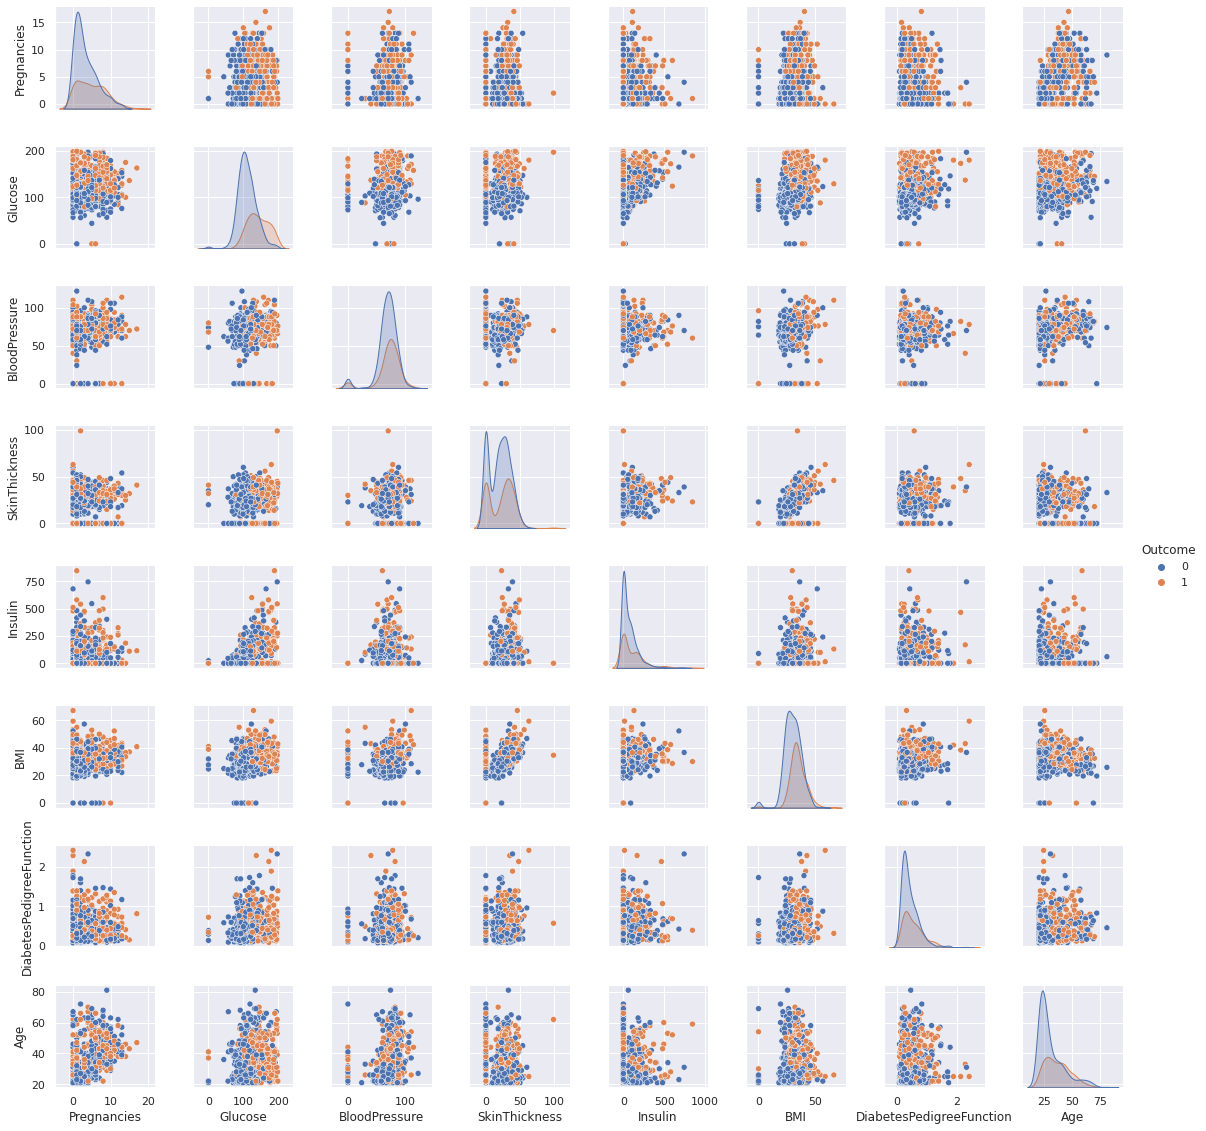

In [53]:
sb.set()
sb.pairplot(df,hue='Outcome',size=2)
plt.show()

In [54]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


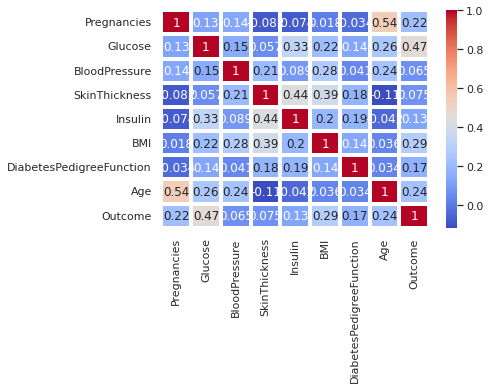

In [72]:
sb.heatmap(df.corr(),cmap="coolwarm",annot=True,linecolor= 'white',linewidths=3)

Text(0, 0.5, 'Age')

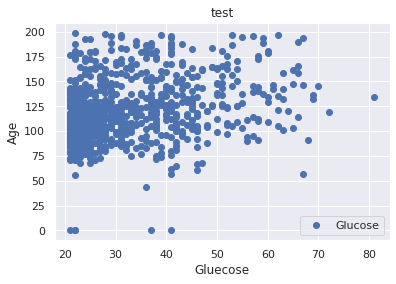

In [23]:
df.plot(x="Age",y="Glucose",style="o")
plt.title("test")
plt.xlabel("Gluecose")
plt.ylabel("Age")

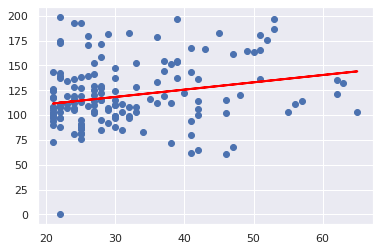

In [26]:
#Train & Test set
x= df['Age'].values.reshape(-1,1) #ทำAray 2 มิติ
y= df['Glucose'].values.reshape(-1,1)

#train 80% test 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#training
model=LinearRegression()
model.fit(x_train,y_train)

#Test Model
y_pred = model.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red",linewidth=2)
plt.show()

In [27]:
#Compare true data vs predict data
#y_pred คือผลการทำนายผลลัพธ์จากโมเดล
#y_test คือ ข้อมูลจริงที่ใช้ทดสอบการทำนายผลโมเดล
df = pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten()}) #แปลงข้อมูลเป็น 1 มิติ

print(df.head())
print(df.shape)

   Actually   Predicted
0       199  112.360712
1       107  113.096844
2        76  114.569108
3       166  133.708536
4       111  118.985899
(154, 2)


In [29]:
#วัดผล
#ถ้าค่าเข้าใกล้ 0 จะ error น้อย
#MAE y_pred ต่างกับ y_test เท่าไหร่
#MSE y_pred ต่างจาก y_test เท่าไหร่


print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMAE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score = ",metrics.r2_score(y_test,y_pred)) #ค่าความแม่นยำ

MAE =  24.61685469537092
MSE =  1022.1124505366497
RMAE =  31.970493435926972
Score =  0.03901096603033105


Insulin vs Glucose

Text(0, 0.5, 'Glucose')

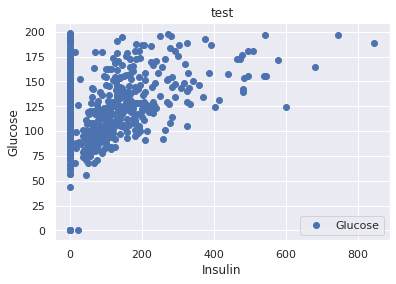

In [41]:
df.plot(x="Insulin",y="Glucose",style="o")
plt.title("test")
plt.xlabel("Insulin")
plt.ylabel("Glucose")

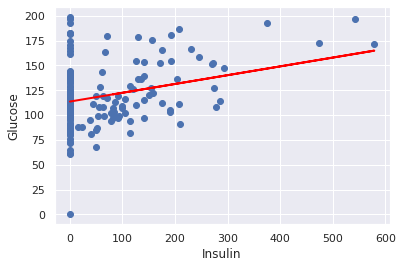

In [43]:
#Train & Test set
x= df['Insulin'].values.reshape(-1,1) #ทำAray 2 มิติ
y= df['Glucose'].values.reshape(-1,1)

#train 80% test 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#training
model=LinearRegression()
model.fit(x_train,y_train)

#Test Model
y_pred = model.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red",linewidth=2)
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.show()

In [44]:
#Compare true data vs predict data
#y_pred คือผลการทำนายผลลัพธ์จากโมเดล
#y_test คือ ข้อมูลจริงที่ใช้ทดสอบการทำนายผลโมเดล
df = pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten()}) #แปลงข้อมูลเป็น 1 มิติ

print(df.head())
print(df.shape)

   Actually   Predicted
0       199  113.624890
1       107  122.477042
2        76  113.624890
3       166  129.116157
4       111  113.624890
(154, 2)


In [45]:
#วัดผล
#ถ้าค่าเข้าใกล้ 0 จะ error น้อย
#MAE y_pred ต่างกับ y_test เท่าไหร่
#MSE y_pred ต่างจาก y_test เท่าไหร่


print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMAE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score = ",metrics.r2_score(y_test,y_pred)) #ค่าความแม่นยำ

MAE =  23.428150090188225
MSE =  936.1459953672779
RMAE =  30.59650299245451
Score =  0.11983653533401806


Glucose and Outcome

Text(0, 0.5, 'Glucose')

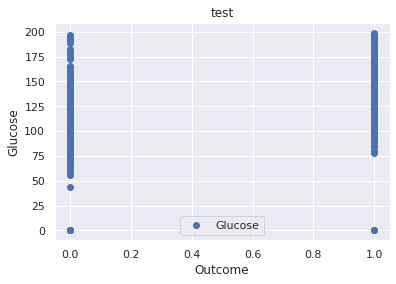

In [64]:
df.plot(x="Outcome",y="Glucose",style="o")
plt.title("test")
plt.xlabel("Outcome")
plt.ylabel("Glucose")

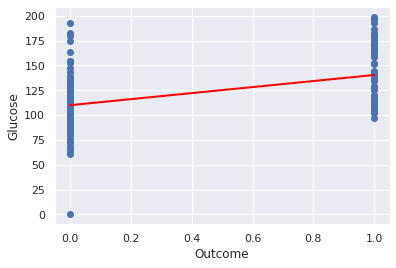

In [65]:
#Train & Test set
x= df['Outcome'].values.reshape(-1,1) #ทำAray 2 มิติ
y= df['Glucose'].values.reshape(-1,1)

#train 80% test 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#training
model=LinearRegression()
model.fit(x_train,y_train)

#Test Model
y_pred = model.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red",linewidth=2)
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.show()

In [66]:
#Compare true data vs predict data
#y_pred คือผลการทำนายผลลัพธ์จากโมเดล
#y_test คือ ข้อมูลจริงที่ใช้ทดสอบการทำนายผลโมเดล
df = pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten()}) #แปลงข้อมูลเป็น 1 มิติ

print(df.head())
print(df.shape)

   Actually   Predicted
0       199  140.361991
1       107  109.949109
2        76  109.949109
3       166  140.361991
4       111  109.949109
(154, 2)


In [67]:
#วัดผล
#ถ้าค่าเข้าใกล้ 0 จะ error น้อย
#MAE y_pred ต่างกับ y_test เท่าไหร่
#MSE y_pred ต่างจาก y_test เท่าไหร่


print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMAE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score = ",metrics.r2_score(y_test,y_pred)) #ค่าความแม่นยำ

MAE =  21.828297357484605
MSE =  806.2233138797077
RMAE =  28.394071808736904
Score =  0.2419897016592455
